This notebook provide some static analysis over public data set of patents available on google bigquery. For more knowledge about dataset refer to this article https://cloud.google.com/blog/products/gcp/google-patents-public-datasets-connecting-public-paid-and-private-patent-data. In this notebook, I have used table **publication** to do the analysis. I have also created a big_query helper class which I will be using to fetch the result from big query. Apart from that there is one more python file patent_detective which uses bigquery_helper to fetch data and plot the data using python matplotlib or other libraries. 

In [1]:
import big_query_helper as bq
import patent_detective_analysis as pt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
bigquery_patents_research = bq.BigQueryHelper(active_project="patents-public-data",
                                    dataset_name="google_patents_research")


In [3]:
# This will get us all the tables under dataset = google_patents_reseach
bigquery_patents_research.get_tables()

['publications',
 'publications_201710',
 'publications_201802',
 'publications_201809']

In [4]:
# Next we will be using `publications` table for our analysis purpose

In [5]:
patent_detective = pt.PatentDetective(active_project='patents-public-data', dataset_name = 'google_patents_research', table_name = 'publications')

### Analysis on inventors of publications
Below we are fetching avg_inventors per country per year from google big query. And then we will be using this to plot various chart from the extracted data. This provides the number of inventor for each country per year. Wel will be using this to plot a simple bar chart and heatmap. 

In [6]:
avg_inventors = patent_detective.avg_inventors_per_country()
avg_inventor_sorted = avg_inventors.sort_values(by='cnt', ascending=False)
avg_inventor_sorted[:1]

,f0_,cnt,country_code,filing_year
767,2.888767,7369566,CN,2015


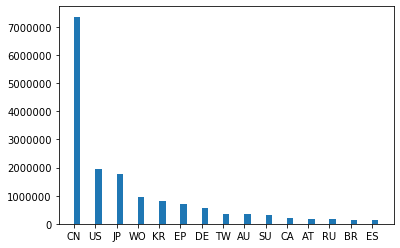

In [8]:
counts_sorted = avg_inventor_sorted['cnt'][:100].tolist()
country_codes_sorted = avg_inventor_sorted['country_code'][:100].tolist()
plt.bar(country_codes_sorted, counts_sorted, align='edge', width=0.3)
plt.show()

Above chart provides the bar chart of number of inventor for each country where CN is having leading all other country with large margin and then being followed by US and JP which are almost equal. 

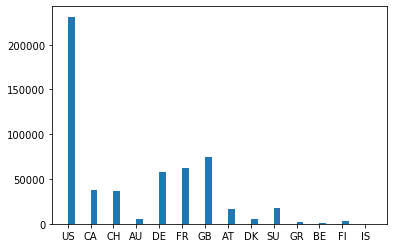

In [9]:
# below is the bar plot for patents count for each country from top 100 row of avg_inventors
counts = avg_inventors['cnt'][:100].tolist()
country_codes = avg_inventors['country_code'][:100].tolist()
plt.bar(country_codes, counts, align='edge', width=0.3)
plt.show()

Below we will be plotting a heatmap depicting the change in number of invetors over a period of time from 1970 to 2015. And we have used 10 countries for this ananlysis which are ('US', 'FR', 'GB', 'AT', 'CH', 'CA', 'AU', 'DE', 'DK', 'SU'). For few countries, number of inventors in not available in google bigquery dataset for some years. 

In [10]:
# unique() method will return the unique country_codes from dataframe avg_inventors
# avg_inventors.country_code.unique()
countries=['US', 'FR', 'GB', 'AT', 'CH', 'CA', 'AU', 'DE', 'DK', 'SU']
filing_years = [1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]
truncated_data = avg_inventors.loc[avg_inventors['country_code'].isin(countries) & avg_inventors['filing_year'].isin(filing_years) ]

In [11]:
truncated_data[:10]

,f0_,cnt,country_code,filing_year
168,1.703795,239645,DE,1970
169,2.099878,9041,AT,1970
173,1.779474,7532,GB,1970
176,1.623402,328544,US,1970
178,1.746557,46042,AU,1970
182,3.253608,23560,SU,1970
191,1.723110,32558,CH,1970
197,1.760020,106363,CA,1970
198,1.917405,16030,DK,1970
199,1.086631,3740,FR,1970


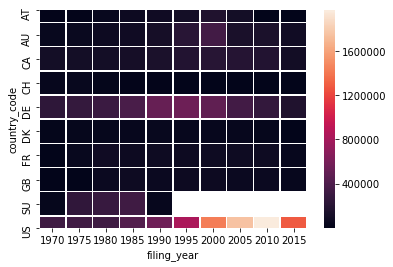

In [12]:
truncated_data_pivoted = truncated_data.pivot('country_code','filing_year','cnt')
sns.heatmap(truncated_data_pivoted, linewidths=.5)

Above we have created a heat map for countries and count of inventors over period of 45 years. This data can also be plotted as an image where our data will act as an image matrix with count being the number of pixel at that particular location. Below is the sample for this:

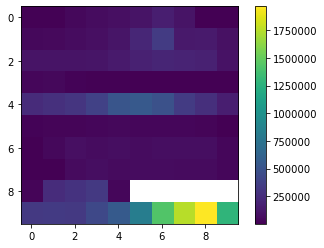

In [16]:
tr_np_array = truncated_data_pivoted.to_numpy()
plt.imshow(tr_np_array, cmap='viridis')
plt.colorbar()
plt.show()

Below analysis is one of the question being asked on indorse platform where we need to find the top term used in 1000 most recent patents. 

In [7]:
# Fetch top terms from project patents-public-data and dataset = google-patents-research 
# project with table = publications and this is with limit of 1000 on publications. 
top_terms = patent_detective.top_terms()
top_terms[:10]

[('method', 203),
 ('process', 85),
 ('means', 65),
 ('cells', 48),
 ('cell', 41),
 ('water', 40),
 ('ml', 39),
 ('characterized', 38),
 ('solution', 36),
 ('mixture', 35)]

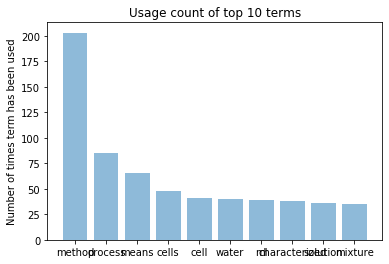

In [8]:
# plot top 10 top terms
patent_detective.plot_top_n_terms(10)

Now, each publication has been cited number of other publication. In google bigquery this data is present as an array of publication which has cited that particular publication. So below is the analysis on publication citation  as to find the most cited publication. We are getting publciation_number and number of times publication has been cited as *cnt*. To get the more details about the publication, we can use publication_number on https://patents.google.com/ to get the details of publication. 

In [9]:
# data around most cited publications
most_cited_publications = patent_detective.most_cited_publications()
most_cited_publications[:10]

,publication_number,cnt
0,US-4683202-A,9709
1,US-4683202-B1,9709
2,US-4816567-A,8136
3,US-4683195-B1,7758
4,US-4683195-A,7758
5,US-5523520-A,4856
6,US-5892900-A,4698
7,US-4946778-A,4651
8,US-4733665-A,4639
9,US-4733665-B1,4639


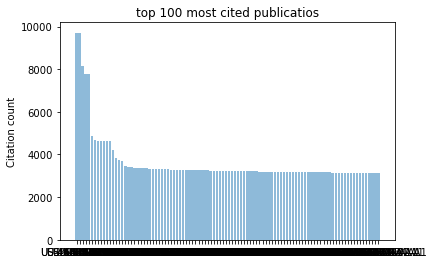

In [10]:
# plot top 100 most cited publications
patent_detective.plot_most_cited_publication(100)

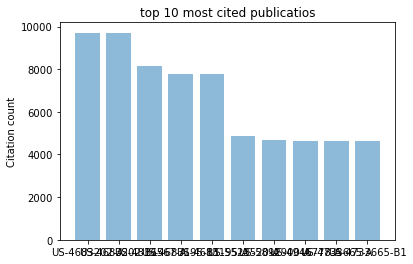

In [13]:
# Char for top 10 most cited publications
patent_detective.plot_most_cited_publication(10)